# WEEK 7
### Name: Manas Goel
### regno: 230968160

## EXERCISE 1: Time Series Analysis
## Use the “employment.csv” data set and perform time series analysis and visualization through the following questions. 

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("employment.csv")

## 1. Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.

In [143]:
df['datestamp']=pd.to_datetime(df.datestamp)

In [144]:
df=df.set_index(df['datestamp'])

In [145]:
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,,
2000-01-01,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
2009-11-01,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
2009-12-01,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1


In [146]:
df.isnull().sum()

datestamp                         0
Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

## 2. Generate a boxplot to find the distribution of unemployment rate for every industry .

<AxesSubplot:>

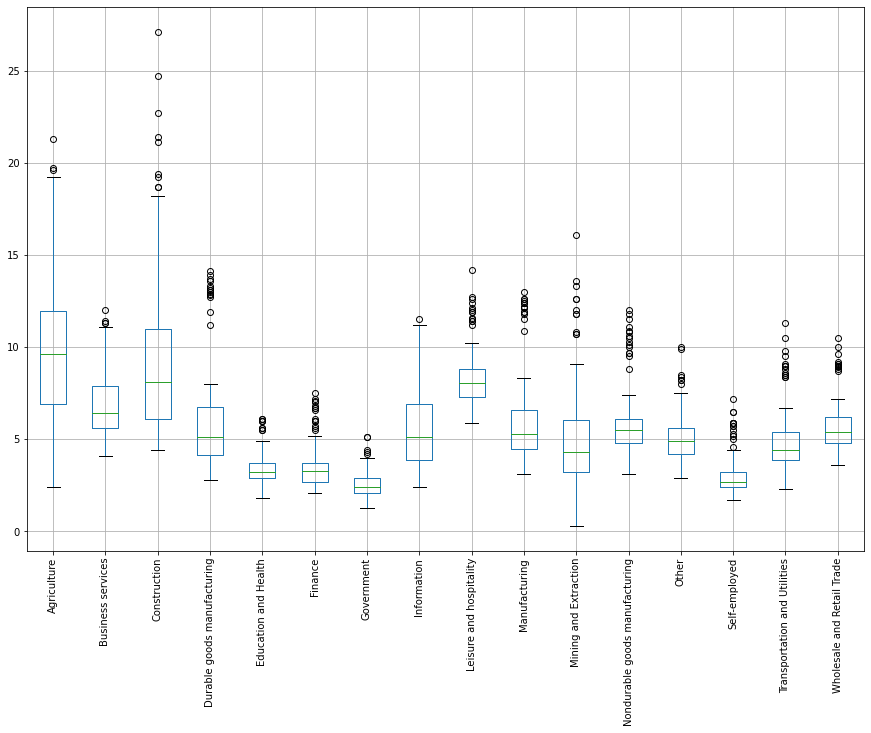

In [147]:
df.boxplot(figsize=(15,10),rot=90)

## 3. Using line chart Visualize the unemployment rate of workers by industry .

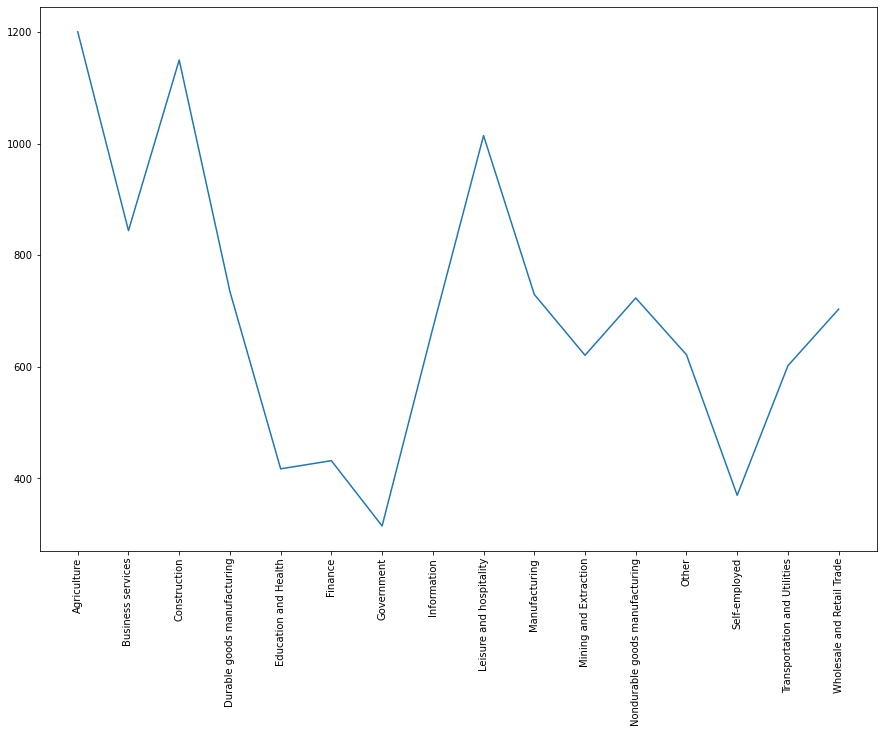

In [148]:
plt.figure(figsize=(15,10))
plt.plot(df.sum(numeric_only=True))
plt.xticks(rotation=90)
plt.show()

## 4. Plot the monthly and yearly trends .

In [149]:
import datetime as dt
df2=df
df2['Year']=pd.to_datetime(df2.datestamp).dt.strftime("%Y")
df2['Month']=pd.to_datetime(df2.datestamp).dt.strftime("%B")

m=df2.groupby('Month').mean()
y=df2.groupby('Year').mean()

<AxesSubplot:xlabel='Year'>

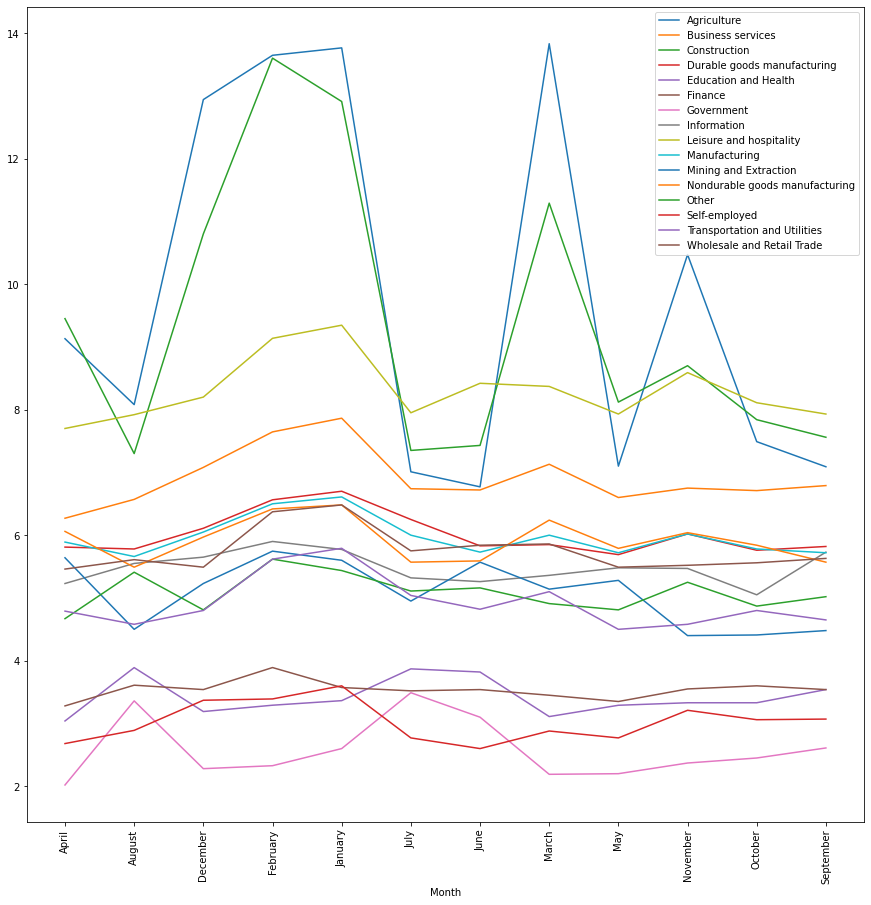

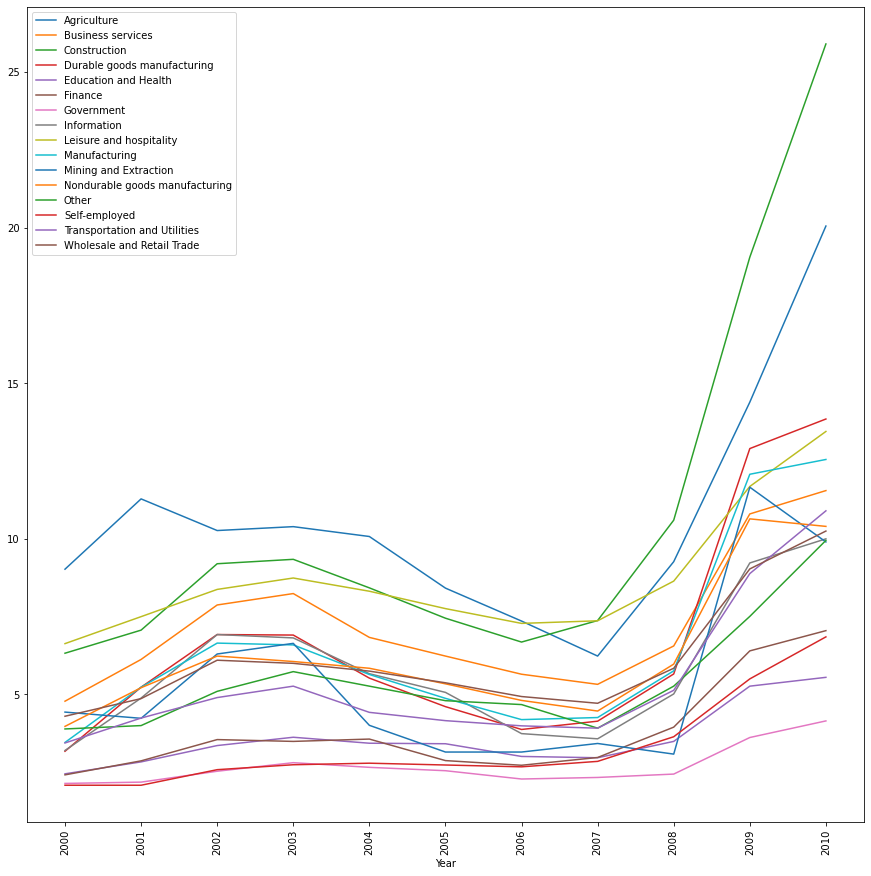

In [150]:
m.plot(figsize=(15,15),rot=90,xticks=range(len(m)))
y.plot(figsize=(15,15),rot=90,xticks=range(len(y)))


## 5. Apply time series decomposition to your dataset to visualize the trend and seasonality.

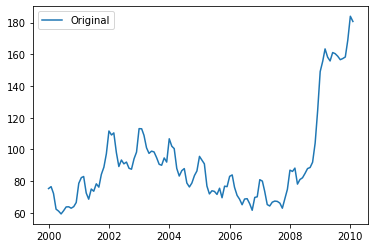

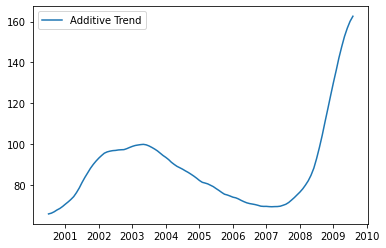

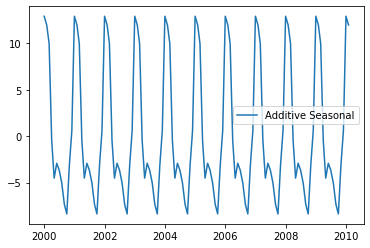

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose

df3=df2.sum(axis=1,numeric_only=True)
plt.plot(df3,label="Original")
plt.legend()
plt.show()

dfadd = seasonal_decompose(df3, model='additive')
plt.plot(dfadd.trend, label='Additive Trend')
plt.legend()
plt.show()

plt.plot(dfadd.seasonal, label='Additive Seasonal')
plt.legend()
plt.show()

## 6. Visualize the seasonality of Agriculture, Health and Finance sector.

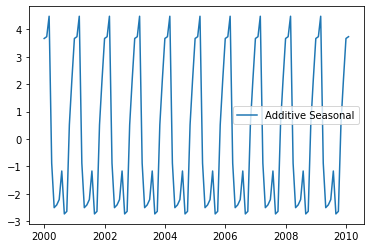

In [209]:
dfahf=df2.loc[:,['Agriculture','Education and Health','Finance']].sum(axis=1)

dfadd = seasonal_decompose(dfahf, model='additive')
plt.plot(dfadd.seasonal, label='Additive Seasonal')
plt.legend()
plt.show()

## 7. Visualize the seasonality of multiple time series and the correlation between each time series in the dataset.

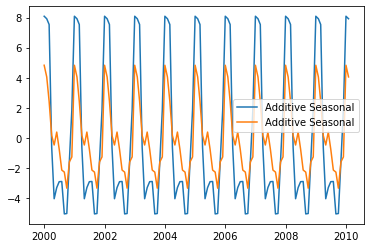

In [226]:
dfgovt=df2.loc[:,["Agriculture",
    "Construction",
    "Education and Health",
    "Finance",
    "Government",
    "Transportation and Utilities",
    "Wholesale and Retail Trade"]]



dfnongovt=df2.loc[:,["Business services",
    "Durable goods manufacturing",
    "Information",
    "Leisure and hospitality",
    "Manufacturing",
    "Mining and Extraction",
    "Nondurable goods manufacturing",
    "Other",
    "Self-employed"]]



dfadd = seasonal_decompose(dfgovt.sum(axis=1), model='additive')
plt.plot(dfadd.seasonal, label='Additive Seasonal')
dfadd = seasonal_decompose(dfnongovt.sum(axis=1), model='additive')
plt.plot(dfadd.seasonal, label='Additive Seasonal')
plt.legend()
plt.show()


